# Questão 1

Implementem e treinem duas redes neurais artificiais para o problema de classificação de
dígitos escritos à mão utilizando a base de dados do MNIST, disponível em:
[mnist-dataset](https://www.kaggle.com/datasets/hojjatk/mnist-dataset). A primeira rede deve ser uma rede
neural perceptron de múltiplas camadas clássica, e a segunda deve ser uma Rede Neural
Convolucional (CNN). Compare o desempenho das duas redes analisando a curva de erro
médio e a matriz de confusão.

In [ ]:
!pip install idx2numpy
!pip install kaggle
!kaggle datasets download hojjatk/mnist-dataset
!unzip mnist-dataset.zip

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7907 sha256=52020974daad8194f3a73cc7d66830c9054d17273106c0f87351944551c71067
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy
Dataset URL: https://www.kaggle.com/datasets/hojjatk/mnist-dataset
License(s): copyright-authors
 41% 9.00M/22.0M [00:00<00:00, 90.3MB/s]
100% 22.0M/22.0M [00:00<00:00, 113MB/s] 
Archive:  mnist-dataset.zip
  inflating: t10k-images-idx3-ubyte/t10k-images-idx3-ubyte  
  inflating: t10k-images.idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte  
  inflating: t10k-labels.idx1-ubyte  
  inflating: train-images-idx3-ubyte/train-images-idx3-ubyte  
  inflating: train-images.idx3-ubyte  
  inflating: train-labels-idx1-ubyte/train-labels-idx1-ubyte  
  inflating: train-labels.idx1-ubyte  


In [ ]:
import numpy as np
import idx2numpy
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [ ]:
# Carregar os dados de treino e os rótulos
train_images_path = 'train-images.idx3-ubyte'
train_labels_path = 'train-labels.idx1-ubyte'

train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)

# Carregar os dados de teste
test_images_path = 't10k-images.idx3-ubyte'
test_labels_path = 't10k-labels.idx1-ubyte'

test_images = idx2numpy.convert_from_file(test_images_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)


In [ ]:
# Pré-processamento dos dados
X_train = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') / 255
X_test = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32') / 255
# Codificação one-hot para as classes
y_train = to_categorical(train_labels, 10)
y_test = to_categorical(test_labels, 10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

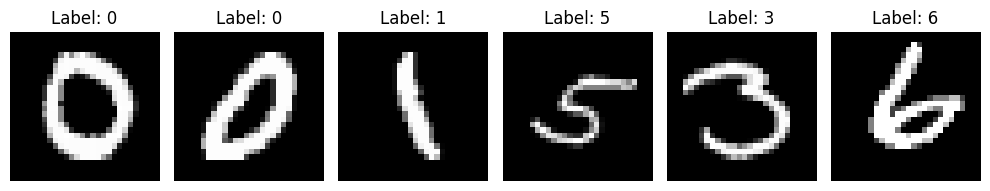

In [ ]:
# Função para visualizar exemplos do Dataset
def plot_sample_images(X, y, num_samples=5):
    plt.figure(figsize=(10, 5))

    for i in range(num_samples):
        index = np.random.randint(0, len(X))

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[index].reshape(28, 28), cmap='gray')
        plt.axis('off')

        label = np.argmax(y[index])
        plt.title(f'Label: {label}')

    plt.tight_layout()
    plt.show()

# Vizualizar 6 imagens do conjunto de treino
plot_sample_images(X_train, y_train, num_samples=6)

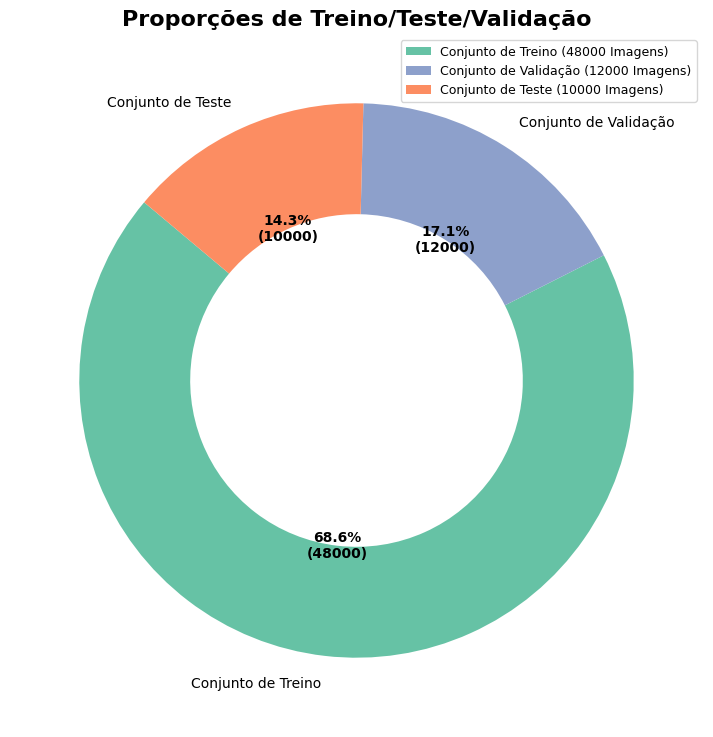

In [ ]:
# Função para visualização da divisão entre treino, validação e teste
def plot_train_val_test_split_pie(x_train, x_val=None, x_test=None):
    # Definir tamanhos conforme os conjuntos fornecidos
    train_size = len(x_train)
    val_size = len(x_val) if x_val is not None else 0
    test_size = len(x_test) if x_test is not None else 0

    # Definir rótulos e tamanhos
    labels = []
    sizes = []
    colors = []

    if train_size > 0:
        labels.append('Conjunto de Treino')
        sizes.append(train_size)
        colors.append('#66c2a5')  # cor para treino

    if val_size > 0:
        labels.append('Conjunto de Validação')
        sizes.append(val_size)
        colors.append('#8da0cb')  # cor para validação

    if test_size > 0:
        labels.append('Conjunto de Teste')
        sizes.append(test_size)
        colors.append('#fc8d62')  # cor para teste

    # Criar o gráfico de pizza
    fig, ax = plt.subplots(figsize=(16, 9))
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct=lambda p: f'{p:.1f}%\n({int(p / 100 * sum(sizes))})',
        startangle=140,
        colors=colors,
        wedgeprops=dict(width=0.4)
    )

    # Personalizar aparência do texto
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)

    # Adicionar um título
    plt.title('Proporções de Treino/Teste/Validação', fontsize=16, fontweight='bold')
    plt.setp(autotexts, size=10, weight="bold")

    # Criar uma legenda
    legend_elements = [Patch(facecolor=colors[i], label=f'{labels[i]} ({sizes[i]} Imagens)') for i in range(len(labels))]
    ax.legend(handles=legend_elements, loc='best', fontsize=9)

    # Exibir o gráfico
    plt.show()

# Exemplo de chamada da função com treino, validação e teste
plot_train_val_test_split_pie(X_train, X_val, X_test)


In [ ]:
# Definir a arquitetura da MLP
mlp_model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Flatten the 28x28 images into vectors
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes de saída
])

# Compilar o modelo
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento da MLP
mlp_history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8872 - loss: 0.3838 - val_accuracy: 0.9688 - val_loss: 0.1031
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.9733 - loss: 0.0851 - val_accuracy: 0.9766 - val_loss: 0.0792
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9842 - loss: 0.0511 - val_accuracy: 0.9753 - val_loss: 0.0822
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9883 - loss: 0.0365 - val_accuracy: 0.9737 - val_loss: 0.0899
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9914 - loss: 0.0276 - val_accuracy: 0.9760 - val_loss: 0.0883
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.9928 - loss: 0.0218 - val_accuracy: 0.9782 - val_loss: 0.0846
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9946 - loss: 0.0169 - val_accuracy: 0.9742 - val_loss: 0.1100
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9942 - loss: 0.0176 - 

In [ ]:
# Definir a arquitetura da CNN
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar o modelo
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinamento da CNN
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 134s 175ms/step - accuracy: 0.8965 - loss: 0.3312 - val_accuracy: 0.9811 - val_loss: 0.0607
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 130s 173ms/step - accuracy: 0.9853 - loss: 0.0469 - val_accuracy: 0.9883 - val_loss: 0.0392
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 143s 174ms/step - accuracy: 0.9922 - loss: 0.0245 - val_accuracy: 0.9866 - val_loss: 0.0465
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 147s 181ms/step - accuracy: 0.9942 - loss: 0.0178 - val_accuracy: 0.9873 - val_loss: 0.0435
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 140s 179ms/step - accuracy: 0.9967 - loss: 0.0099 - val_accuracy: 0.9879 - val_loss: 0.0468
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 143s 180ms/step - accuracy: 0.9971 - loss: 0.0092 - val_accuracy: 0.9898 - val_loss: 0.0448
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 138s 175ms/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9902 - val_loss: 0.0446
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 144s 178ms/step - accuracy: 0.9982 -

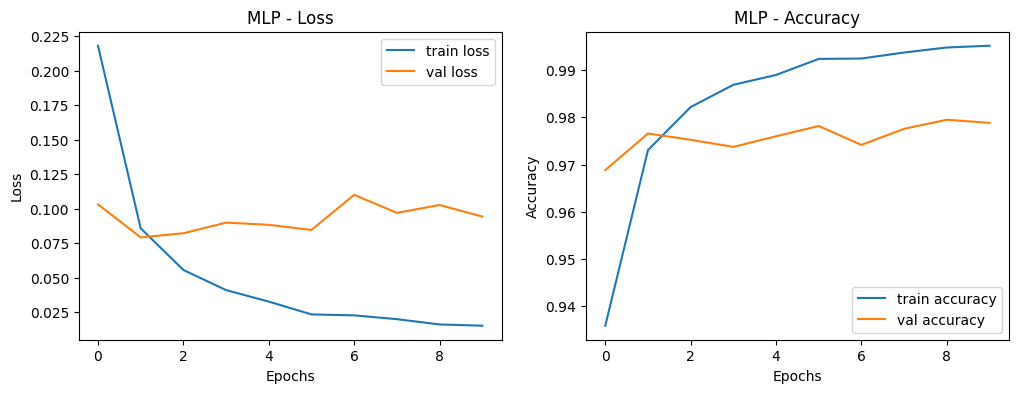

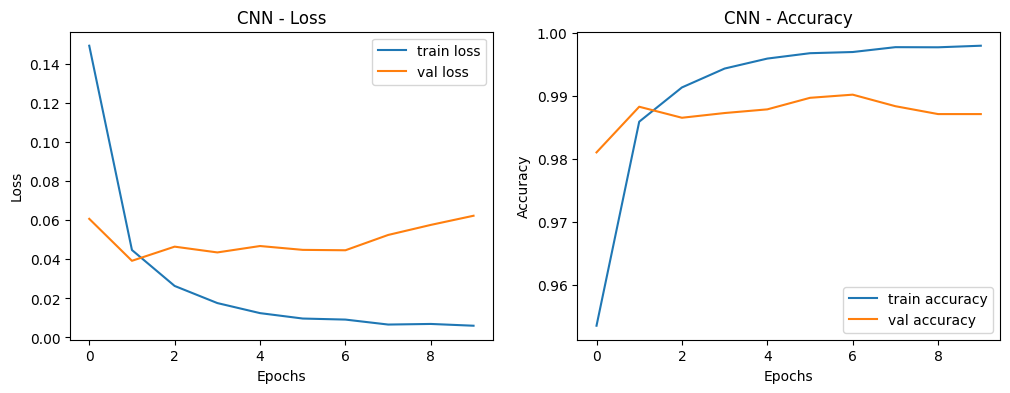

In [ ]:
# Função para plotar as curvas
def plot_metrics(history, title):
    plt.figure(figsize=(12, 4))

    # Plotando a perda (loss)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotando a acurácia
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Plot das métricas da MLP
plot_metrics(mlp_history, "MLP")

# Plot das métricas da CNN
plot_metrics(cnn_history, "CNN")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


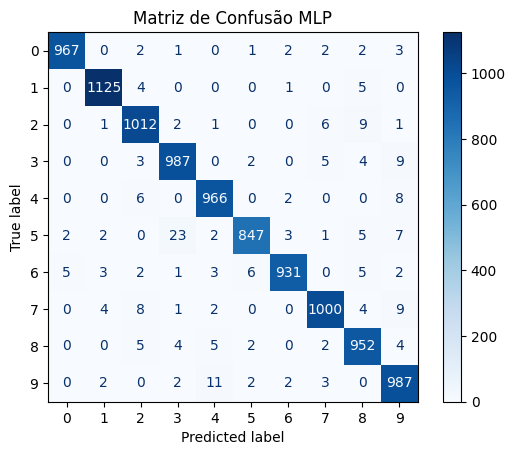

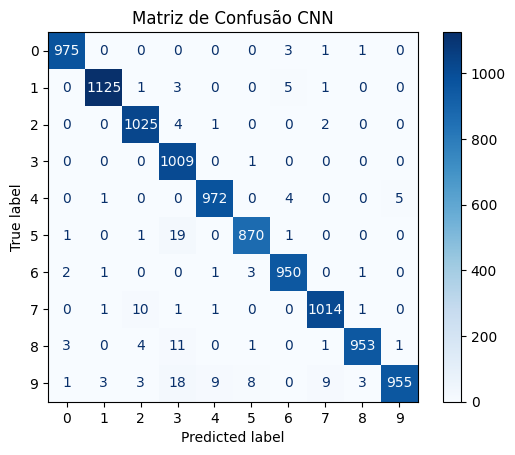

In [ ]:
# Previsões MLP
mlp_predictions = np.argmax(mlp_model.predict(X_test), axis=-1)
y_test_mlp = np.argmax(y_test, axis=-1)

# Previsões CNN
cnn_predictions = np.argmax(cnn_model.predict(X_test), axis=-1)
y_test_cnn = np.argmax(y_test, axis=-1)

# Matriz de confusão MLP
cm_mlp = confusion_matrix(y_test_mlp, mlp_predictions)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp_mlp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão MLP")
plt.show()

# Matriz de confusão CNN
cm_cnn = confusion_matrix(y_test_cnn, cnn_predictions)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn)
disp_cnn.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão CNN")
plt.show()